Esto es una celda Markdown (texto)

# Análisis de posición del mecanismo manivela corredera por método analítico

## Objetivo

Encontrar valores de las variables del mecanismo que me permitan posicionar sus barras, usando método analítico.

## Contexto

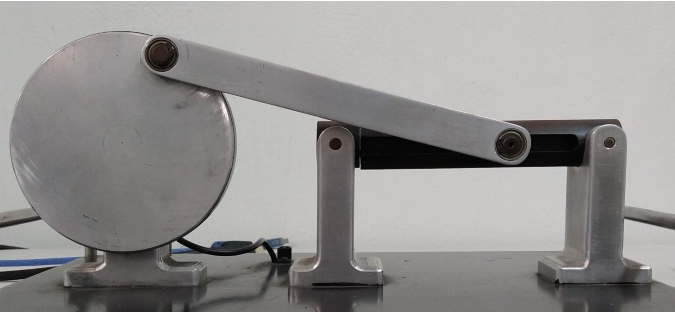

## Diagrama cinemático y vectorial

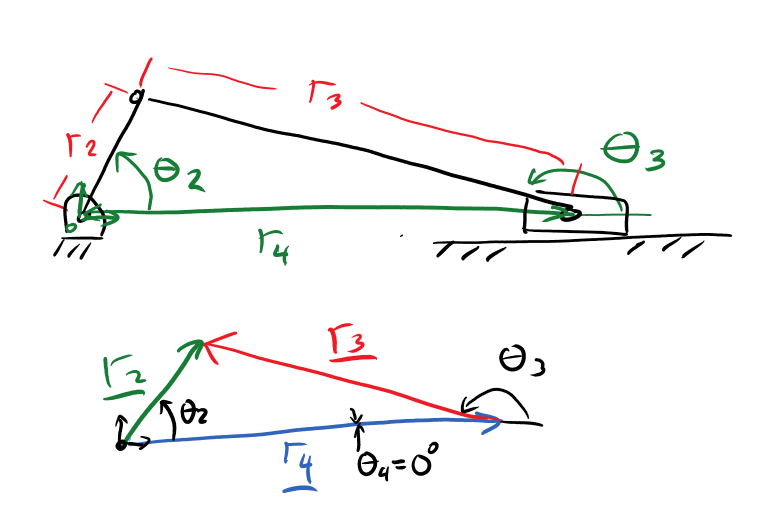

Usar este enlace para escribir las ecuaciones en formáto LaTeX: https://codecogs.com/latex/eqneditor.php

Parámetros: $r2$, $r3$, $\theta_4$

Variable de entrada: $\theta_2$

Variables secundarias: $\theta_3$ y $r_4$

A partir del diagrama vectorial, se puede plantear una ecuación vectorial que represente al mecanismo:

$\overrightarrow{r_{2}}-\overrightarrow{r_{3}}-\overrightarrow{r_{4}} = 0$ (1)

cuyas ecuaciones escalares son

$r2\cdot cos(\theta_{2})-r3\cdot cos(\theta_{3})-r4\cdot cos(\theta_{4})=0$, (2)

$r2\cdot sin(\theta_{2})-r3\cdot sin(\theta_{3})-r4\cdot sin(\theta_{4})=0$ (3).

Vamos a encontrar $\theta_3$ y $r_4$ en términos de $\theta_2$.

Resolviendo el sistema de ecuaciones (2) y (3), obtenemos

$\theta_{3}=sin^{-1}(k_{1})$ (4) o

$\theta_{3}=\pi + sin^{-1}(-k_{1})$ (5),

donde $k_{1} = \frac{r_{2}sin(\theta_2)}{r_3}$ (6), y

$r_4=r_2cos(\theta_2)-r_3cos(\theta_3)$ (7).


## Solución

tareas:

- implementar las ecuaciones (4), (5) y (7)
- usar funciones trigonométricas

para hacer esto debo importar (incluir en el programa) un módulo que me lo permita

In [1]:
import numpy as np
# esto es un comentario
# las funciones trigonométricas hacen parte del módulo Numpy. Se llaman np."Nombre de la funcion" sin las comillas

ahora definamos los parámetros y le damos un valor a la variable de entrada.

In [2]:
r2 = 5
r3 = 17.5
th4 = 0
print("los parámetros son: ")
print(r2,r3,th4)

th2 = np.deg2rad(0)

los parámetros son: 
5 17.5 0


Ahora vamos a definir las ecuaciones (4) y (5)

Nota: la función trigonomética $sin^{-1}$ es np.arcsin()

In [3]:
k1 = r2*np.sin(th2)/r3

th3a = np.arcsin(k1)
th3b = np.pi + np.arcsin(-k1)

print(np.rad2deg(th3a),np.rad2deg(th3b))

0.0 180.0


utilizaremos la ecuación (5), porque corresponde al mecanismo físico estudiado.

Luego calculamos $r_4$ evaluando el último resultado en (7)

In [4]:
r4 = r2*np.cos(th2) - r3*np.cos(th3b)
print(r4)

22.5


En conclusión, obtuvimos que para $\theta_2=$,

In [5]:
print(np.rad2deg(th2))

0.0


$r_4$ [cm] y $\theta_3$ [°] corresponden respectivamente a

In [6]:
print(r4,np.rad2deg(th3b))
th3 = th3b

22.5 180.0


## Visualizar el mecanismo en el plano

Habiendo hayado las variables secundarias y conociendo los parámetros, podemos graficar el mecanismo usando líneas como representaciones de las barras.

Primero debo ubicar las líneas, para ello debo identificar los puntos.

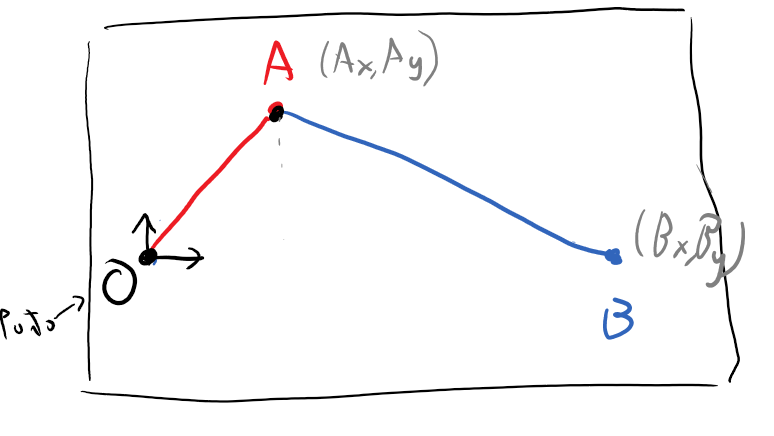

En la anterior imagen se muestran los puntos:

- $O$
- $A$
- $B$

Ahora, para representar las barras:

- La barra $r_2$ se puede representar con una línea entre los puntos $O$ y $A$
- La barra $r_3$ se puede representar con una línea entre los puntos $A$ y $B$

No requerimos representar la tierra en este caso, por lo que no la vamos a dibujar.

## Calcular la ubicación de los puntos

Usemos los vectores para ubicar los puntos:

- $O$ está en el origen del sistema coordenado, por lo que sus coordenadas serían

In [7]:
puntoOx = 0
puntoOy = 0

- $A$ se puede ubicar usando el vector $r_2$

In [8]:
puntoAx =  r2*np.cos(th2)
puntoAy =  r2*np.sin(th2)
print("Ax = ",puntoAx," cm\nAy = ",puntoAy," cm")

Ax =  5.0  cm
Ay =  0.0  cm


- $B$ se puede ubicar usando los vectores $r_2$ y $r_3$.
 - También se puede ubicar usando el vector $r_4$

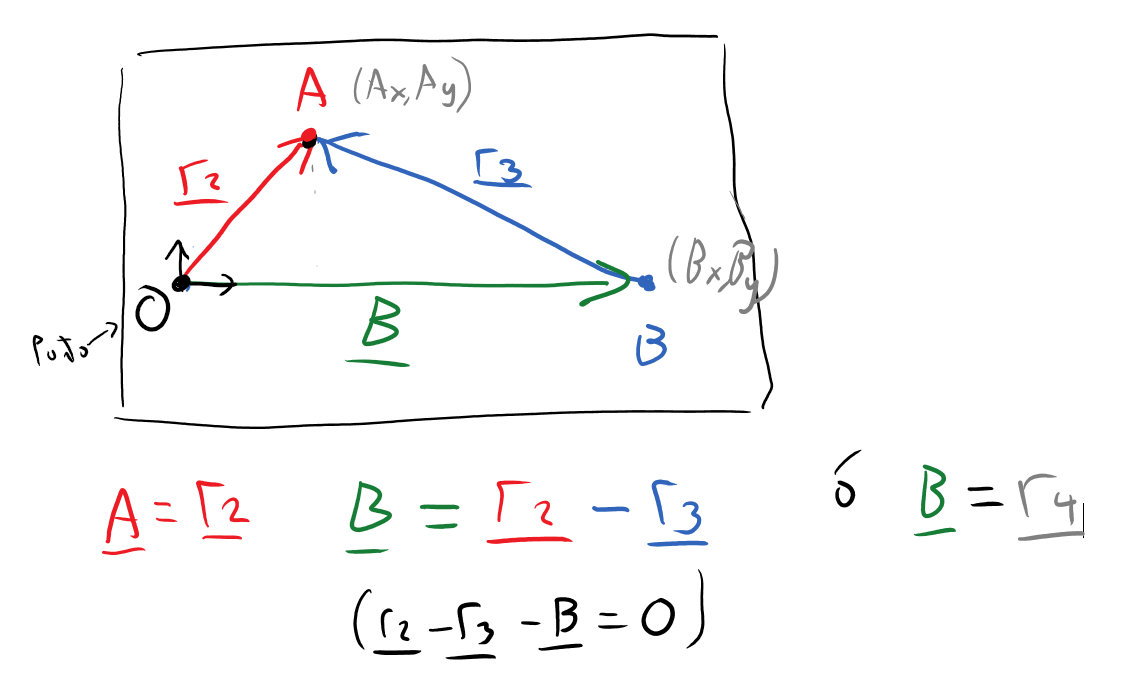

In [9]:
# Alternativa 1
puntoBx = puntoAx - r3*np.cos(th3)
puntoBy = puntoAy - r3*np.sin(th3)
# Alternativa 2
# puntoBx = r4*np.cos(th4)
# puntoBy = r4*np.sin(th4)

print("Bx = ",puntoBx," cm\nBy = ",puntoBy," cm")

Bx =  22.5  cm
By =  -2.1431318985078682e-15  cm


## Graficar las líneas en el plano

Para esto necesitamos importar el módulo Matplotlib.

In [10]:
import matplotlib.pyplot as plt

Luego vamos a:
1. crear la figura (el lienzo donde vamos a hacer la gráfica),
2. crear cada barra. Para esto debo definir los puntos de la barra (punto inicial y punto final),
3. modificar las propiedades de mi gráfica, entre ellas:
- hacer que quede a escala,
- definir los límites,
- agregar una cuadrícula,
4. por último, dibujar.

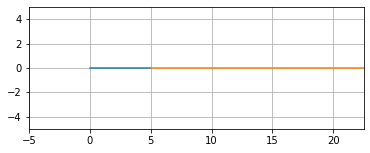

In [11]:
fig = plt.figure()
hr2 = plt.plot([puntoOx,puntoAx],[puntoOy,puntoAy])
hr3 = plt.plot([puntoAx,puntoBx],[puntoAy,puntoBy])
plt.axis("scaled")
plt.xlim(-r2,r2+r3)
plt.ylim(-r2,r2)
plt.grid()
plt.draw() 